In [92]:
import pandas 
import json 
import os
import numpy as np
import pandas as pd

In [93]:
def xuly(quotes):
    value={}
    for i in quotes:
        if(i=='quote'):continue
        value[i]=quotes[i]
    tmp= quotes['quote']
    for j in tmp:
        value[j]=tmp[j]
    return value
def xuly_data(listquotes):
    value=[]
    for i in listquotes:
        value.append(xuly(i))
    return value
        
        

In [94]:
def get_address_data(path_to_year):
    #path_to_year='./data/historical-data'
    list_path_to_year=[path_to_year+'/'+path+'/'+'coin-id-1' for path in os.listdir(path_to_year)]
    list_path=[]
    for i in list_path_to_year:
        for path in os.listdir(i):
            if path.endswith('.json'):
                list_path.append(i+'/'+path)
    return list_path
def getQuotes(path_to_year):
    data_coin_history_by_id=[]
    list_path=get_address_data(path_to_year)
    for i in list_path:
        data_tmp=json.load(open(i,'r'))
        if(len(data_tmp['quotes'])!=0):data_coin_history_by_id+=(data_tmp['quotes'])
    return data_coin_history_by_id
def xyly_ngay_gio_to_gio(object):
    tmp=object.split('T')[1]
    return tmp[0:8]
def xyly_ngay_gio_to_ngay(object):
    tmp=object.split('T')[0]
    return tmp
#xuly_data(data_coin_history_by_id)
def getData(path_to_year):
    data_coin_history_by_id=getQuotes(path_to_year)
    data_=pandas.DataFrame(xuly_data(data_coin_history_by_id))
    for i in data_.keys():
        data_=data_[data_[i]!=0]

    del data_['timeOpen']
    del data_['timeClose']
    data_['date']=''
    data_["timeHigh"] = data_["timeHigh"].apply(xyly_ngay_gio_to_gio)
    data_["timeLow"] = data_["timeLow"].apply(xyly_ngay_gio_to_gio)
    data_["date"] = data_["timestamp"].apply(xyly_ngay_gio_to_ngay)
    del data_['timestamp']
    return data_
path1='./data/historical-data'
data_train=getData(path1)
path_2022="./bitcoin-2022-historical-data/bitcoin-2022-historical-data/"
data_2022=getData(path_2022)
data=[data_train,data_2022]
data=pd.concat(data)


In [95]:
def handleDataForModel(data):
    data_train=data[data["date"]>='2015-01-01']
    data_train=data_train[["open","close","volume","high","low"]]
    l_volume=list(data_train["volume"])
    l_volume.insert(0,0)
    l_volume.pop()
    data_train["bfvolume"]=l_volume

    l_close=list(data_train["close"])
    l_close.insert(0,0)
    l_close.pop()
    data_train["bfclose"]=l_close

    l_high=list(data_train["high"])
    l_high.insert(0,0)
    l_high.pop()
    data_train["bfhigh"]=l_high

    l_low=list(data_train["low"])
    l_low.insert(0,0)
    l_low.pop()
    data_train["bflow"]=l_low
    data_train=data_train[data_train["bfvolume"]!=0]
    data_train=data_train[['open',"close","bfvolume","bfclose","bfhigh","bflow"]]
    return data_train

**IMPORT LIBRARY**

In [96]:
#Scale data
from sklearn.preprocessing import MinMaxScaler    
from sklearn.preprocessing import StandardScaler

#for linear regression model
from sklearn.linear_model import LinearRegression   
from sklearn.model_selection import train_test_split




## Random Forest ##

***Get data***

In [97]:
data_train=handleDataForModel(data)
data_train.shape

(2892, 6)

***Validation Set***

In [98]:
#Split data training and testing - Validation set
np.random.seed(0) #so data can have same values
df_train, df_test = train_test_split(data_train, train_size = 0.8, test_size = 0.2, random_state = 100)

***Understanding Data***

In [99]:
df_train.shape

(2313, 6)

In [100]:
df_test.shape

(579, 6)

In [101]:
df_train.describe()

,open,close,bfvolume,bfclose,bfhigh,bflow
count,2313.000000,2313.000000,2.313000e+03,2313.000000,2313.000000,2313.000000
mean,13342.958947,13338.517476,1.694873e+10,13340.567752,13670.975970,12958.753166
std,16308.083307,16288.526549,2.009846e+10,16303.133487,16715.229532,15830.295805
min,176.897003,178.102997,7.860650e+06,178.102997,211.731003,171.509995
25%,908.114990,907.937988,1.533510e+08,907.609985,919.325989,887.007996
50%,7398.633906,7379.950195,9.252936e+09,7397.796815,7537.950195,7233.399538
75%,18263.929255,18321.144916,2.862467e+10,18264.992107,18626.292652,17619.532389
max,67549.735581,67566.830088,3.509679e+11,67566.830088,68530.339686,66382.061008


In [102]:
df_test.describe()

,open,close,bfvolume,bfclose,bfhigh,bflow
count,579.000000,579.000000,5.790000e+02,579.000000,579.000000,579.000000
mean,13026.188427,13065.019270,1.683846e+10,13027.857443,13373.771150,12643.432479
std,16680.688955,16731.899656,2.053246e+10,16682.313830,17159.508071,16166.577827
min,207.834000,199.259995,1.060090e+07,208.097000,221.591003,199.770996
25%,747.401001,751.600525,1.089020e+08,747.299988,755.941010,735.097015
50%,6742.390137,6793.624596,6.608310e+09,6741.750000,6857.490234,6575.000000
75%,16523.873503,16563.153018,2.938319e+10,16524.724144,16704.833865,16154.949386
max,65521.289342,64949.961915,1.263581e+11,65466.841024,68789.625939,63647.808247


***Train the Model***

In [103]:
temp=df_train.copy()
y_train = temp.pop('close') 
x_train = temp

In [104]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(random_state=0)    
rf.fit(x_train,y_train)

RandomForestRegressor(random_state=0)

In [105]:
rf.score(x_train,y_train)

0.999571327492609

***Test data***

In [106]:
#Using model
temp=df_test.copy()
y_test = temp.pop('close')
x_test = temp
predictions = rf.predict(x_test)

***Evaluate the model***

In [107]:
from sklearn.metrics import r2_score 
r2_score(y_test, predictions)
##0.9978656992392166 - Normal scale
##0.9974552487920492 - Min max scale
##0.9978443316073371 - Khong scale

0.9967435267136902

In [108]:
# R squared value
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
#accurancy, precision, recall - MSE - RMSE
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print("MSE: ",mse)
print("RMSE: ",rmse)
#Normal scale
# MSE:  0.0021343007607833395
# RMSE:  0.0461984930574942
#Min max scale
# MSE:  0.0001524621998012703
# RMSE:  0.012347558455065936

MSE:  910096.1922770103
RMSE:  953.9896185373352


In [111]:
df_predict=pd.DataFrame(predictions)

C:\Users\hungn\AppData\Local\Temp\ipykernel_22280\1466841827.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - predictions),ax=ax,color='b')


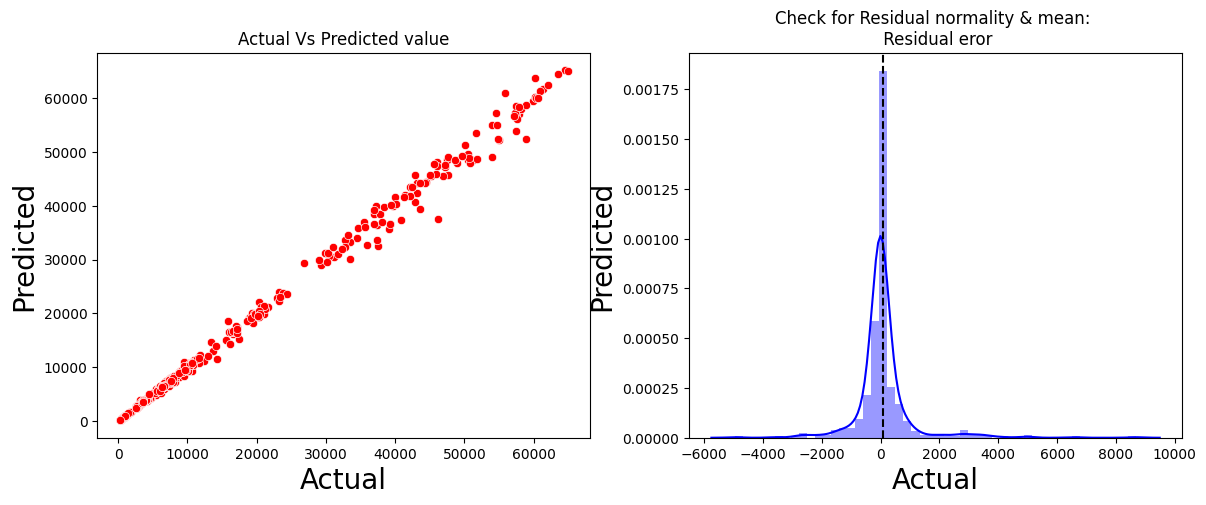

In [112]:
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
plt.xlabel('Actual', fontsize=20)                         
plt.ylabel('Predicted', fontsize=20)   
sns.scatterplot(x=y_test,y=predictions,ax=ax,color='r')
ax.set_title('Actual Vs Predicted value')
# Check for Residual normality & mean
ax = f.add_subplot(122)
   
sns.distplot((y_test - predictions),ax=ax,color='b')

ax.axvline((y_test - predictions).mean(),color='k',linestyle='--')
plt.xlabel('Actual', fontsize=20)                         
plt.ylabel('Predicted', fontsize=20)
ax.set_title('Check for Residual normality & mean: \n Residual eror');

- Nhìn vào biểu đồ ta thấy dữ liệu thực tế với dữ liệu dự đoán gần như tương đồng nhau.

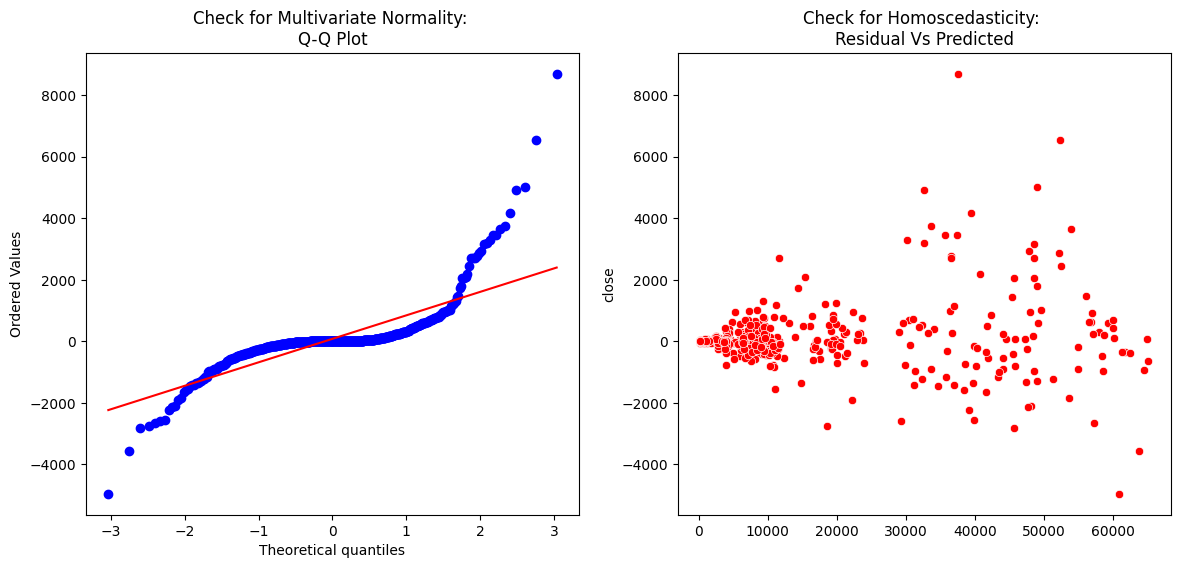

In [113]:
# Check for Multivariate Normality
# Quantile-Quantile plot 
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - predictions),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test - predictions), x= predictions, ax = ax[1],color='r') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');


## Linear Regression ##

***Get data***

In [114]:
data_train.shape

(2892, 6)

***Validication data***

***Train the model***

In [115]:
temp=df_train.copy()
y_train = temp.pop('close') 
x_train = temp

In [116]:
#using linear regression
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [117]:
lm.score(x_train,y_train)

0.9974552487920492

***Test data***

In [118]:
lm.coef_

array([-7.12837425e-02,  6.60729037e-10,  1.10013086e+00, -1.58806047e-02,
       -1.57571360e-02])

In [119]:
#Using model
temp=df_test.copy()
y_test = temp.pop('close')
x_test = temp
predictions = lm.predict(x_test)

***Evaluate the model***

In [120]:
from sklearn.metrics import r2_score 
r2_score(y_test, predictions)

0.9978443316073371

In [121]:
# R squared value
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
#accurancy, precision, recall - MSE - RMSE
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print("MSE: ",mse)
print("RMSE: ",rmse)

MSE:  602451.0025069407
RMSE:  776.1771721114585


In [122]:
df_predict=pd.DataFrame(predictions)

C:\Users\hungn\AppData\Local\Temp\ipykernel_22280\1466841827.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - predictions),ax=ax,color='b')


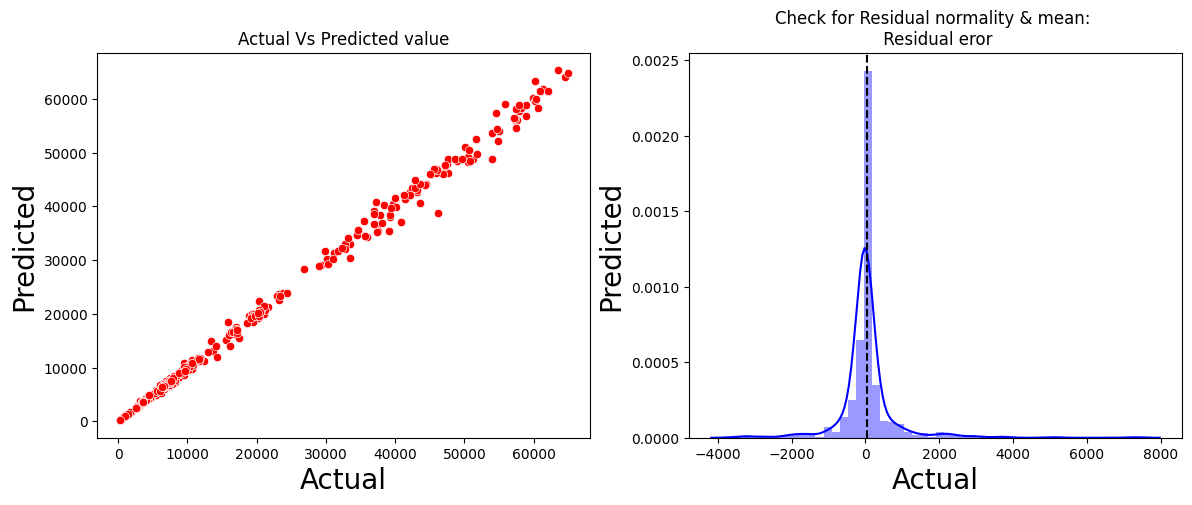

In [123]:
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
plt.xlabel('Actual', fontsize=20)                         
plt.ylabel('Predicted', fontsize=20)   
sns.scatterplot(x=y_test,y=predictions,ax=ax,color='r')
ax.set_title('Actual Vs Predicted value')
# Check for Residual normality & mean
ax = f.add_subplot(122)
   
sns.distplot((y_test - predictions),ax=ax,color='b')

ax.axvline((y_test - predictions).mean(),color='k',linestyle='--')
plt.xlabel('Actual', fontsize=20)                         
plt.ylabel('Predicted', fontsize=20)
ax.set_title('Check for Residual normality & mean: \n Residual eror');

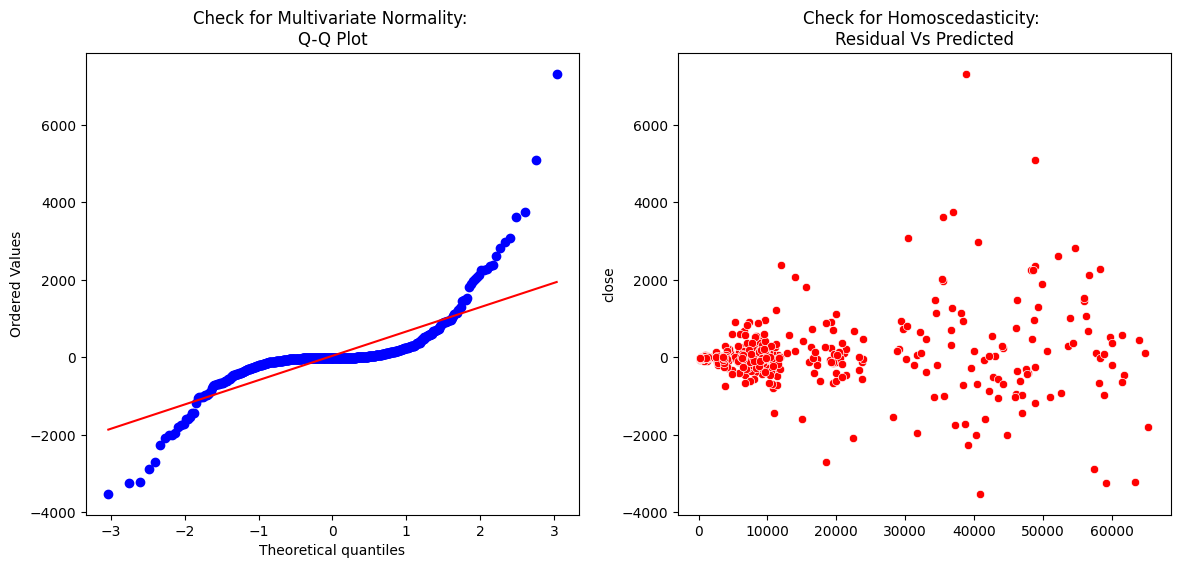

In [124]:
# Check for Multivariate Normality
# Quantile-Quantile plot 
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - predictions),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test - predictions), x= predictions, ax = ax[1],color='r') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');


## Decision Tree ##

***Get data***

***Validication Data***

***Understand Data***

***Train the model***

In [125]:
temp=df_train.copy()
y_train = temp.pop('close') 
x_train = temp

In [126]:
#using Decision Tree
from sklearn.tree import DecisionTreeRegressor

dtr=DecisionTreeRegressor(random_state=0)    
dtr.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [127]:
dtr.score(x_train,y_train)

1.0

***Test data***

In [128]:
#Using model
temp=df_test.copy()
y_test = temp.pop('close')
x_test = temp
predictions = dtr.predict(x_test)

***Evaluate data***

In [129]:
from sklearn.metrics import r2_score 
r2_score(y_test, predictions)

0.994713049953247

In [130]:
# R squared value
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
#accurancy, precision, recall - MSE - RMSE
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse) 
print("MSE: ",mse)
print("RMSE: ",rmse)

MSE:  1477559.520152262
RMSE:  1215.5490611868622


In [131]:
df_predict=pd.DataFrame(predictions)

C:\Users\hungn\AppData\Local\Temp\ipykernel_22280\1466841827.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - predictions),ax=ax,color='b')


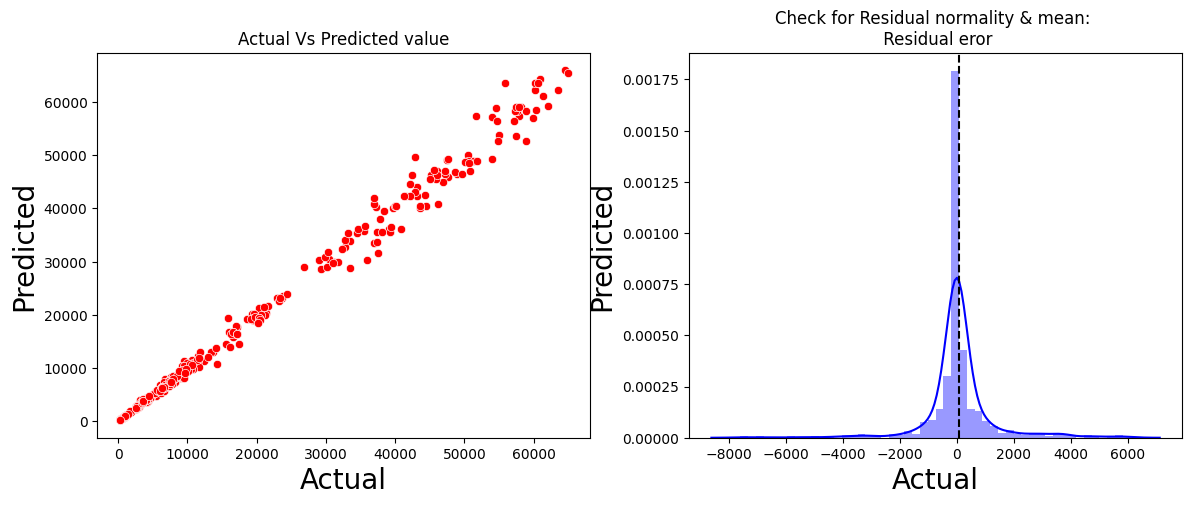

In [132]:
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
plt.xlabel('Actual', fontsize=20)                         
plt.ylabel('Predicted', fontsize=20)   
sns.scatterplot(x=y_test,y=predictions,ax=ax,color='r')
ax.set_title('Actual Vs Predicted value')
# Check for Residual normality & mean
ax = f.add_subplot(122)
   
sns.distplot((y_test - predictions),ax=ax,color='b')

ax.axvline((y_test - predictions).mean(),color='k',linestyle='--')
plt.xlabel('Actual', fontsize=20)                         
plt.ylabel('Predicted', fontsize=20)
ax.set_title('Check for Residual normality & mean: \n Residual eror');

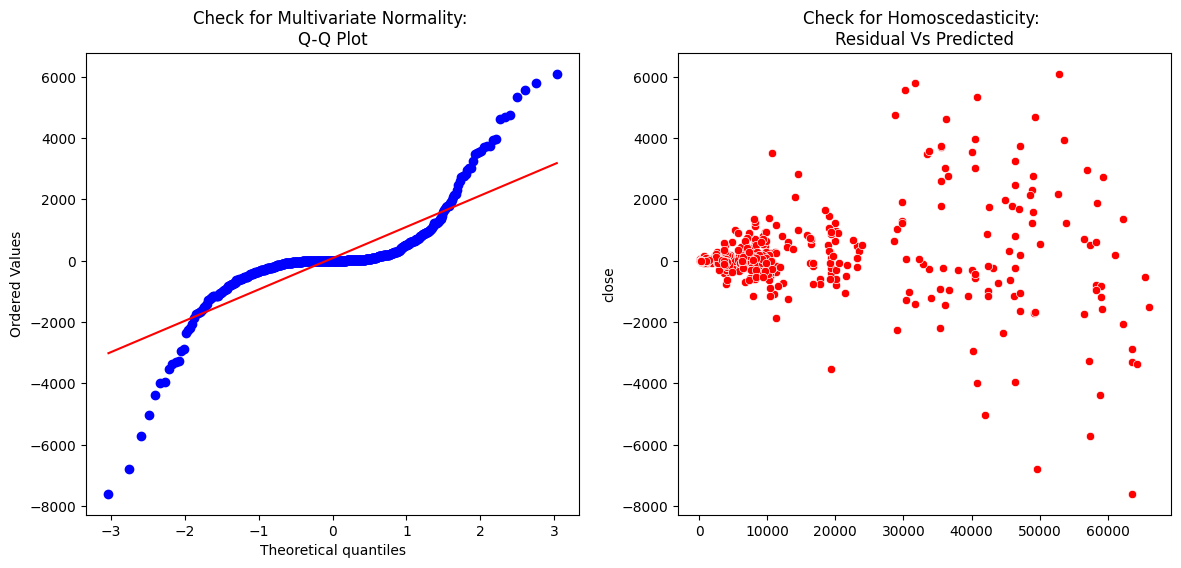

In [133]:
# Check for Multivariate Normality
# Quantile-Quantile plot 
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - predictions),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test - predictions), x= predictions, ax = ax[1],color='r') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');


## Conclusion ##

In [ ]:
print("Multiple Linear Regression Model Score is ",round(lm.score(X_test,y_test)*100))
print("Decision tree  Regression Model Score is ",round(tr_regressor.score(X_test,y_test)*100))
print("Random Forest Regression Model Score is ",round(rf_regressor.score(X_test,y_test)*100))

#Let's have a tabular pandas data frame, for a clear comparison

models_score =pd.DataFrame({'Model':['Multiple Linear Regression','Decision Tree','Random forest Regression'],
                            'Score':[mlr_score,decision_score,rf_score],
                            'Explained Variance Score':[expl_mlr,expl_tr,expl_rf]
                           })
models_score.sort_values(by='Score',ascending=False)